<a href="https://colab.research.google.com/github/LeeJeaHyuk/2021-2022-study/blob/main/2022datascience/fish_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도 학습  
비지도 학습


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [4]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 2.18MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [5]:
!ls

Fish.csv  fish-market.zip  sample_data


In [6]:
df = pd.read_csv('Fish.csv')

In [7]:
df.head(158)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


Species: 종    
Weight: 무게  
Length1: 세로 길이  
Length2: 대각선 길이  
Length3: 십자 길이	 	 
Height: 높이  
Width: 대각선 너비 	

종의 특성들에 대한 정보로 종을 추정하는 것

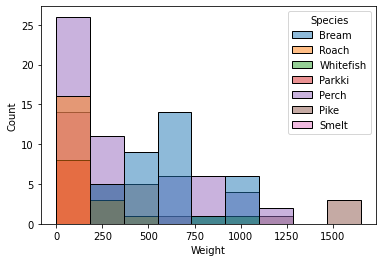

In [8]:
sns.histplot(x='Weight', data=df, hue='Species' )

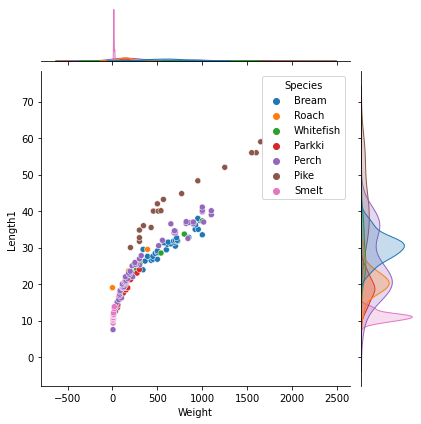

In [9]:
sns.jointplot(data=df, x='Weight', y='Length1', hue='Species')

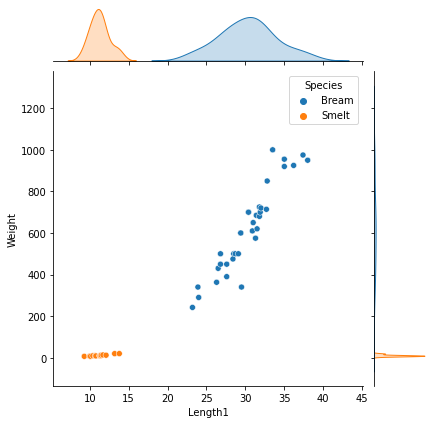

In [10]:
sns.jointplot(data=df[(df['Species']=='Bream') | (df['Species']=='Smelt')], x='Length1', y='Weight', hue='Species')

#df[(df['Species']=='Bream') | (df['Species']=='Smelt')]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [13]:
X_num = df[['Weight','Length1','Length2','Length3','Height','Width']]
y= df['Species']

In [14]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled,index=X_num.index, columns=X_num.columns)
X=X_scaled
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [17]:
from xgboost import XGBClassifier

In [18]:
from sklearn.metrics import classification_report

In [19]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [20]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

       Bream       1.00      0.91      0.95        11
      Parkki       0.33      0.33      0.33         3
       Perch       0.79      0.88      0.83        17
        Pike       1.00      1.00      1.00         5
       Roach       0.29      0.33      0.31         6
       Smelt       1.00      0.75      0.86         4
   Whitefish       1.00      0.50      0.67         2

    accuracy                           0.77        48
   macro avg       0.77      0.67      0.71        48
weighted avg       0.79      0.77      0.78        48



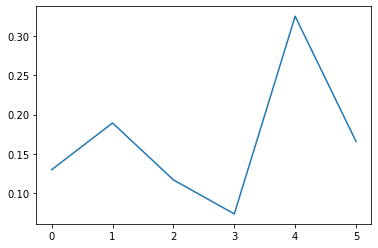

In [22]:
plt.plot(model_xgb.feature_importances_)

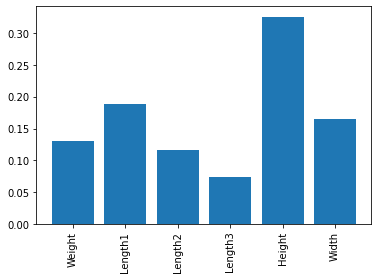

In [23]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90) 
plt.show()